In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [254]:
df = pd.read_csv('data_for_lr.csv')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [255]:
df.isnull().sum()
df = df.dropna()

## Visualisation of Data

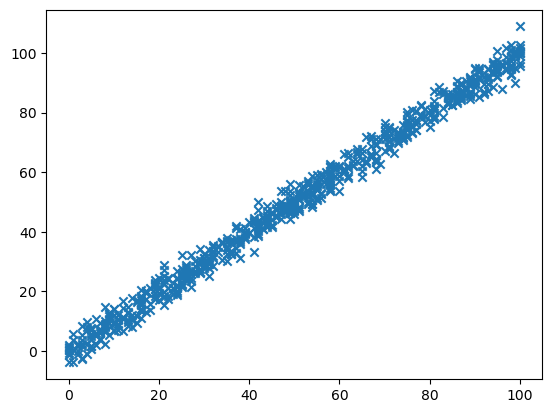

In [256]:
x = df['x']
y = df['y']
plt.scatter(x, y, marker='x')

## Model building

In [257]:
x_train = np.array(df['x'].iloc[:500])
y_train = np.array(df['y'].iloc[:500])

x_test = np.array(df['x'].iloc[500:])
y_test = np.array(df['y'].iloc[500:])

$$f = w*x+b$$

In [258]:
def model(x, w, b):
    return w*x + b

$$J = \frac{1}{2N}\sum_{N}(\hat{y} - (w*x + b))^2$$

In [259]:
def cost(y_train, x, w, b):
    n = y_train.shape[0]
    y = model(x, w, b)
    sum_squared_error = ((y_train - y)**2).sum()
    return (1/(2*n))*(sum_squared_error)

$$\frac{\partial f }{\partial w} = \frac{1}{N}\sum_{N}(\hat{y} - (w*x + b))*x$$
$$\frac{\partial f }{\partial b} = \frac{1}{N}\sum_{N}(\hat{y} - (w*x + b))$$

In [261]:
def df_dwb(y_train, x, w_i, b_i):
    n = y_train.shape[0]
    error = model(x_train, w_i,b_i) - y_train
    sum_w = 0
    for i in range(n):
        curr_val_w = error[i]*x[i]
        sum_w += curr_val_w

    sum_b = error.sum()
    
    return sum_w/n, sum_b/n

In [284]:
def model_fit(y_train, x, w_i, b_i, error = 0.001, alpha = 0.01, max_count = 100):
    cost_val = cost(y_train, x, w_i, b_i)
    w = w_i
    b = b_i
    count = 0
    while (cost_val > error) and (count <= max_count):
        df_dw, df_db = df_dwb(y_train, x, w, b)
        
        
        w = w - alpha*df_dw
        b = b - alpha*df_db
        
        cost_val = cost(y_train, x, w, b)
        count += 1
    return w, b